In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [29]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [30]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [31]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [32]:
##drop month day and year 
df.drop(['day','month','year'],axis=1)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [34]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
Classes            1
not fire           1
not fire           1
Name: count, dtype: int64

In [35]:
#encoding 
df['Classes'] = np.where(df['Classes'].str.contains("not fire"),0,1)

In [36]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [21]:
df['Classes'].value_counts()

Classes
1    138
0    106
Name: count, dtype: int64

In [37]:
#Independent and dependent feature
df.drop(['day', 'month', 'year'], axis=1, inplace=True)
X = df.drop('FWI',axis=1)
y = df['FWI']

In [38]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [39]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
239    6.5
240    0.0
241    0.2
242    0.7
243    0.5
Name: FWI, Length: 244, dtype: float64

In [40]:
#Train test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [41]:
X_train.shape, X_test.shape

((183, 11), (61, 11))

In [42]:
#Feature selection bsed on correlation 
X_test.corr()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.624783,-0.378234,-0.229281,0.588456,0.481973,0.360609,0.603038,0.451394,0.533743,0.335827
RH,-0.624783,1.000000,0.269477,0.150634,-0.659965,-0.448556,-0.256203,-0.659410,-0.384972,-0.403462,-0.417689
Ws,-0.378234,0.269477,1.000000,-0.074499,-0.178704,-0.000262,0.068924,-0.022251,0.023039,-0.056352,-0.045715
Rain,-0.229281,0.150634,-0.074499,1.000000,-0.532842,-0.369544,-0.370496,-0.413393,-0.380291,-0.490496,0.201667
FFMC,0.588456,-0.659965,-0.178704,-0.532842,1.000000,0.627707,0.521588,0.726708,0.608848,0.745355,0.141868
DMC,0.481973,-0.448556,-0.000262,-0.369544,0.627707,1.000000,0.870887,0.762184,0.983223,0.634162,0.154087
DC,0.360609,-0.256203,0.068924,-0.370496,0.521588,0.870887,1.000000,0.540966,0.943997,0.590418,-0.099772
ISI,0.603038,-0.659410,-0.022251,-0.413393,0.726708,0.762184,0.540966,1.000000,0.699766,0.724704,0.213951
BUI,0.451394,-0.384972,0.023039,-0.380291,0.608848,0.983223,0.943997,0.699766,1.000000,0.633913,0.057597
Classes,0.533743,-0.403462,-0.056352,-0.490496,0.745355,0.634162,0.590418,0.724704,0.633913,1.000000,0.084417


<Axes: >

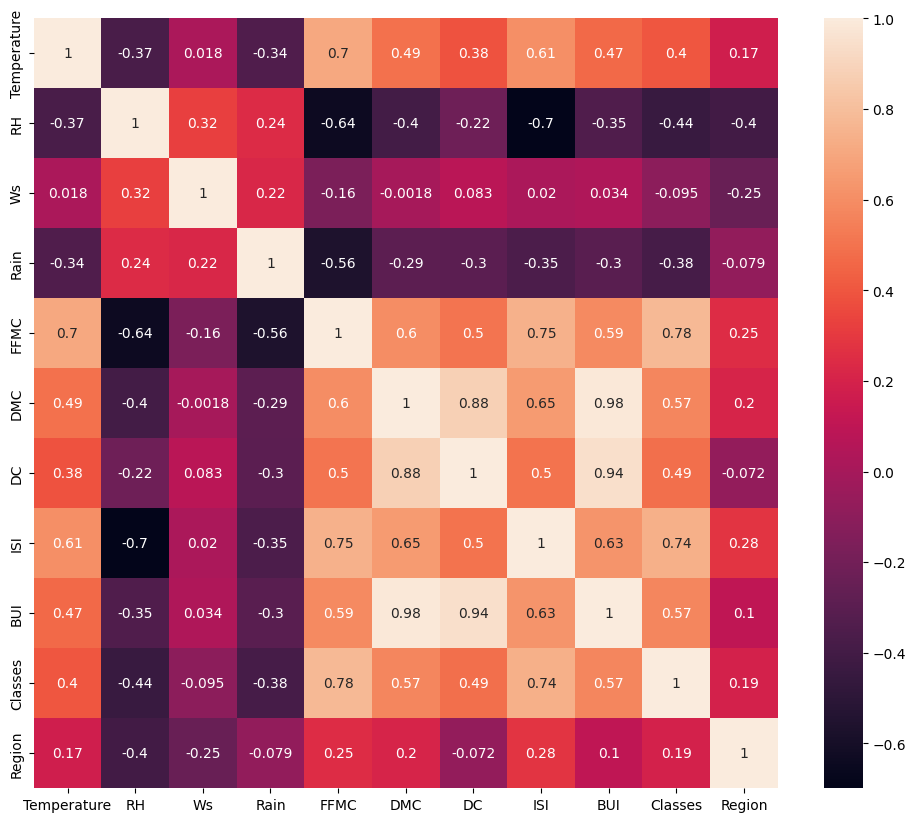

In [43]:
#check for multicolinearity

plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr,annot=True)


In [44]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [45]:

## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

In [46]:
#drop the feature when correlaton is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)

X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((183, 9), (61, 9))

Feature scaling or Standardization 

In [47]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [55]:

X_train_scaled


array([[-0.64393998,  0.17761838,  1.2063152 , ..., -0.78605505,
        -1.14736903, -1.00547949],
       [ 0.95158636, -0.40980626,  0.1747466 , ...,  0.83114678,
         0.87155917,  0.99455037],
       [-0.18807531,  0.63450421, -0.51296581, ..., -0.23089621,
         0.87155917,  0.99455037],
       ...,
       [-1.55566932,  0.89558183,  0.5186028 , ..., -1.09984047,
        -1.14736903, -1.00547949],
       [ 0.26778936, -0.34453686,  0.1747466 , ...,  0.46908667,
         0.87155917,  0.99455037],
       [-0.41600765,  0.96085123,  1.89402761, ..., -0.88260441,
        -1.14736903, -1.00547949]])

Text(0.5, 1.0, 'X_train After Scaling')

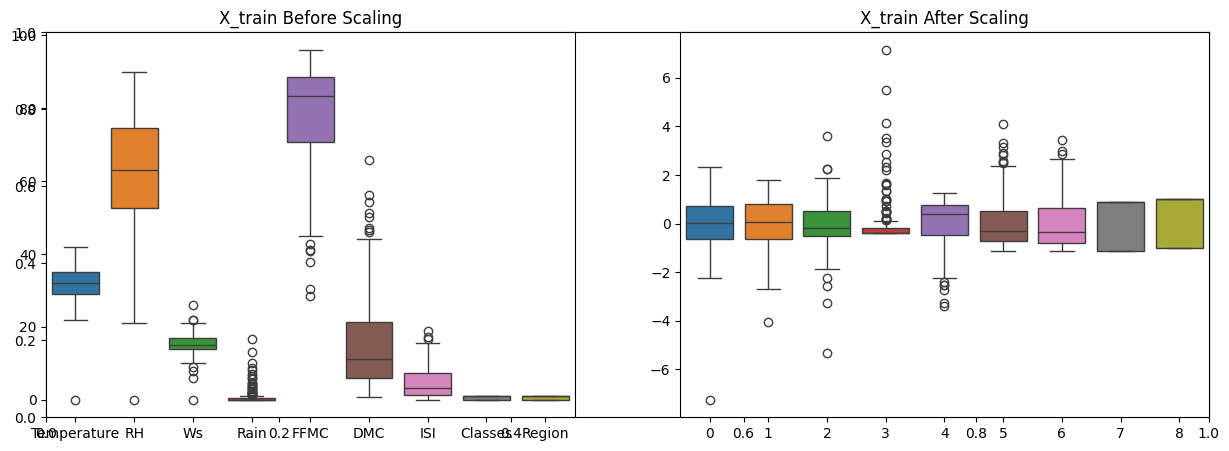

In [49]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

In [65]:
print(np.any(np.isnan(X_test)))  # Check for NaNs after scaling


False


[[-0.18807531  0.11234897 -0.16910961 -0.38101065  0.62495847 -0.04597897
   0.22771326  0.87155917 -1.00547949]
 [ 0.26778936 -0.54034507 -0.85682201 -0.38101065  0.7283983  -0.38998609
   0.39667465  0.87155917 -1.00547949]
 [-0.87187232 -0.27926745  0.862459    0.60577243 -0.96111899 -0.92599717
  -0.85846707 -1.14736903  0.99455037]
 [ 0.72365402 -0.60561447  0.5186028  -0.15674177  0.17671919  0.47403178
  -0.49640696  0.87155917  0.99455037]
 [ 1.8633157  -1.38884733 -1.88839062 -0.33615687  0.99044588  0.62603493
   1.14493221  0.87155917  0.99455037]
 [ 1.63538336  0.11234897 -2.23224683  0.15723467 -0.2646241  -0.24598311
  -0.88260441 -1.14736903  0.99455037]
 [ 1.63538336 -1.51938614 -0.16910961 -0.2913031   0.80425418  0.08202367
   0.83114678  0.87155917  0.99455037]
 [-0.41600765  0.69977362 -0.85682201  1.41314041 -1.5127981  -0.965998
  -1.00329111 -1.14736903  0.99455037]
 [-0.87187232  1.09139004 -1.20067822 -0.38101065 -0.30600004 -0.42198675
  -0.83432973 -1.1473690

Linear Regression Model

mean absolute error 0.05333813003375054
R2 score 0.9999955196872176


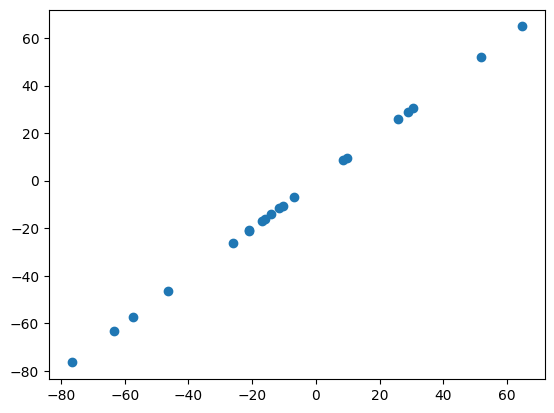

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
Score = r2_score(y_test,y_pred)
print("mean absolute error",mae)
print("R2 score",Score)

plt.scatter(y_test,y_pred)


Mean absolute error 2.0551186504274748
R2 Score 0.9949981332306371


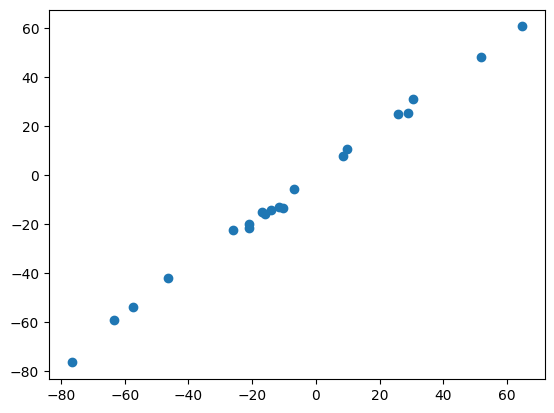

In [73]:
#Lasso 
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.4441841548831345
R2 Score 0.999739700710299


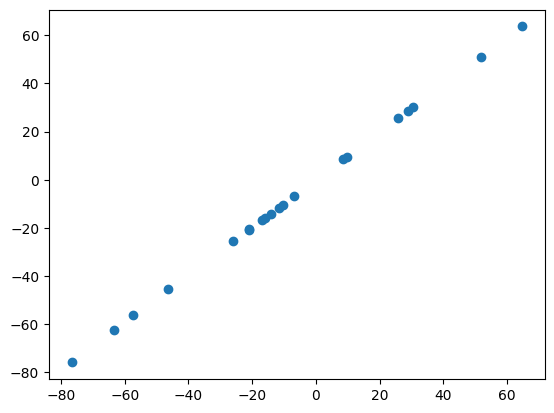

In [75]:
#Ridge
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 10.883662571458357
R2 Score 0.8452839598739226


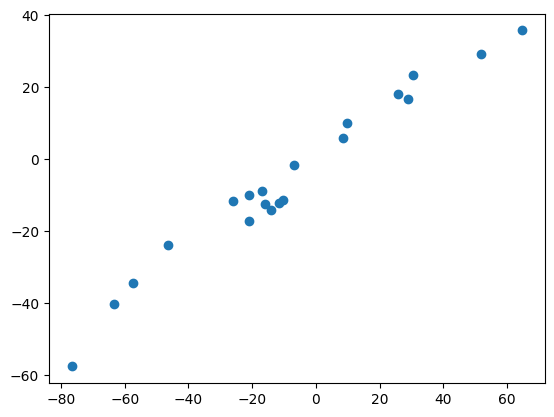

In [77]:
#Elastic
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

cross validatiion Lasso

Mean absolute error 2.0551186504274748
R2 Score 0.9949981332306371


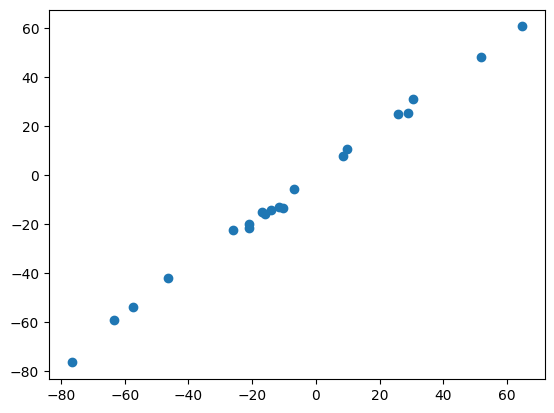

In [78]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)